# Airbnb Price Inference

## Planning Stage: Data Description & Exploratory Data Analysis

### Data Description

This [dataset](https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities) provides a comprehensive look at Airbnb prices in some of the most popular European cities. The data has been collected using spatial econometric methods to analyse and identify the determinants of Airbnb prices across these cities.

The number of observations is 2074, 1948, 4614, 5379, 4492, and 4535 for Budapest weekdays/weekends, London weekdays/weekends, and Rome weekdays/weekends respectively. The number of observations for Budapest, London, and Rome is 23042 observations in total. The number of variables is 19. The name, type, and description of variables are:
- `realSum`: the full price of accommodation for two people and two nights in EUR (Numeric)
- `room_type`: the type of the accommodation (Categorical)
- `room_shared`: dummy variable for shared rooms (Boolean)
- `room_private`: dummy variable for private rooms (Boolean)
- `person_capacity`: the maximum number of guests (Numeric)
- `host_is_superhost`: dummy variable for superhost status (Boolean)
- `multi`: dummy variable if the listing belongs to hosts with 2-4 offers (Boolean)
- `biz`: dummy variable if the listing belongs to hosts with more than 4 offers (Boolean)
- `cleanliness_rating`: cleanliness rating (Numeric)
- `guest_satisfaction_overall`: overall rating of the listing (Numeric)
- `bedrooms`: number of bedrooms (0 for studios) (Numeric)
- `dist`: distance from city centre in km (Numeric)
- `metro_dist`: distance from nearest metro station in km (Numeric)
- `attr_index`: attraction index of the listing location (Numeric)
- `attr_index_norm`: normalised attraction index (0-100) (Numeric)
- `rest_index`: restaurant index of the listing location (Numeric)
- `attr_index_norm`: normalised restaurant index (0-100) (Numeric)
- `lng`: longitude of the listing location (Numeric)
- `lat`: latitude of the listing location (Numeric)

#### Source and information
The data source and citation as requested by the owner(s) is
> Gyódi, K., & Nawaro, Ł. (2021). Determinants of Airbnb prices in European cities: A spatial econometrics approach (Supplementary Material) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.4446043

#### Pre-selection of variables
Some variables will be discarded since they contain redundant information and won’t be needed in future analysis. The variables that will be dropped and their brief explanations are:
- `attr_index_norm`: normalised `attr_index`
- `rest_index_norm`: normalised `rest_index`
- `room_shared`: boolean variable for `room_type="Shared room"`
- `room_private`: boolean variable for `room_type="Private room"`

### Question

The question to be answered using the dataset is: 
> We want to examine the association between the total price of the Airbnb listings (response) and predictors related to property characteristics (e.g., room type, maximum number of people, number of bedrooms), host attributes(e.g., superhost status, cleanliness rating, guest satisfaction rating), and geographical factors (e.g., distance from city centre, distance from nearest metro station).

The response is the total price of the Airbnb listings, in which the response variables is `realSum`.

The question is focused on inference, as we aim to understand how different factors influence Airbnb prices and determine the significance of these relationships. However, there is also a predictive element, as understanding these associations could help in forecasting pricing trends for new listings.

### Exploratory Data Analysis and Visualization

In [1]:
library(MASS)
library(leaps)
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.2.1     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard

In [2]:
# Demonstrate that the dataset can be loaded into R.
df1 <- read.csv("https://raw.githubusercontent.com/rchanpra/stat-301-project/refs/heads/main/data/budapest_weekdays.csv")
df2 <- read_csv("https://raw.githubusercontent.com/rchanpra/stat-301-project/refs/heads/main/data/budapest_weekends.csv")
df3 <- read_csv("https://raw.githubusercontent.com/rchanpra/stat-301-project/refs/heads/main/data/london_weekdays.csv")
df4 <- read_csv("https://raw.githubusercontent.com/rchanpra/stat-301-project/refs/heads/main/data/london_weekends.csv")
df5 <- read_csv("https://raw.githubusercontent.com/rchanpra/stat-301-project/refs/heads/main/data/rome_weekdays.csv")
df6 <- read_csv("https://raw.githubusercontent.com/rchanpra/stat-301-project/refs/heads/main/data/rome_weekends.csv")

New names:
• `` -> `...1`
Rows: 1948 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 4614 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): room_type
dbl (16): ...1, realSum, person_capacity, multi, biz, cleanliness_rating, gu...
lgl  (3): room_shared, room_private, host_is_superhost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 5379 Columns: 20
── Column specification ─────────────────

In [3]:
# Clean and wrangle the data into a tidy format.
df1 <- df1 %>% mutate(city = "budapest", weekends = 0) %>% select(-X)
df2 <- df2 %>% mutate(city = "budapest", weekends = 1) %>% select(-...1)
df3 <- df3 %>% mutate(city = "london", weekends = 0) %>% select(-...1)
df4 <- df4 %>% mutate(city = "london", weekends = 1) %>% select(-...1)
df5 <- df5 %>% mutate(city = "rome", weekends = 0) %>% select(-...1)
df6 <- df6 %>% mutate(city = "rome", weekends = 1) %>% select(-...1)
df <- rbind(df1, rbind(df2, rbind(df3, rbind(df4, rbind(df5, df6)))))
df <- df %>% mutate(room_shared = ifelse(toupper(room_shared) == "TRUE", 1, 0),
                    room_private = ifelse(toupper(room_private) == "TRUE", 1, 0),
                    host_is_superhost = ifelse(toupper(host_is_superhost) == "TRUE", 1, 0))
df <- df %>% select(-room_shared, -room_private, -attr_index_norm, -rest_index_norm)
head(df)

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat,city,weekends
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,238.9905,Entire home/apt,6,1,0,1,10,99,1,0.3593550,0.3526430,404.4047,893.4773,19.05074,47.50076,budapest,0
2,300.7943,Entire home/apt,6,0,0,1,9,98,2,0.9294272,0.2002355,1676.8760,452.5397,19.04493,47.50405,budapest,0
3,162.3819,Entire home/apt,4,1,0,0,10,98,1,2.4508403,0.2794518,163.5885,191.9923,19.02170,47.49882,budapest,0
4,118.4377,Entire home/apt,2,0,0,0,9,92,1,1.5594494,0.4779711,191.7198,326.2156,19.06301,47.51126,budapest,0
5,134.4174,Entire home/apt,4,1,1,0,10,99,2,1.1138030,0.2701016,198.6035,635.5159,19.06900,47.49900,budapest,0
6,127.3676,Entire home/apt,4,0,1,0,9,91,2,0.2684703,0.1669317,635.6350,1005.6535,19.05480,47.50094,budapest,0


In [4]:
cat('\nData has', sum(is.na(df)), 'rows with missing values.')


Data has 0 rows with missing values.

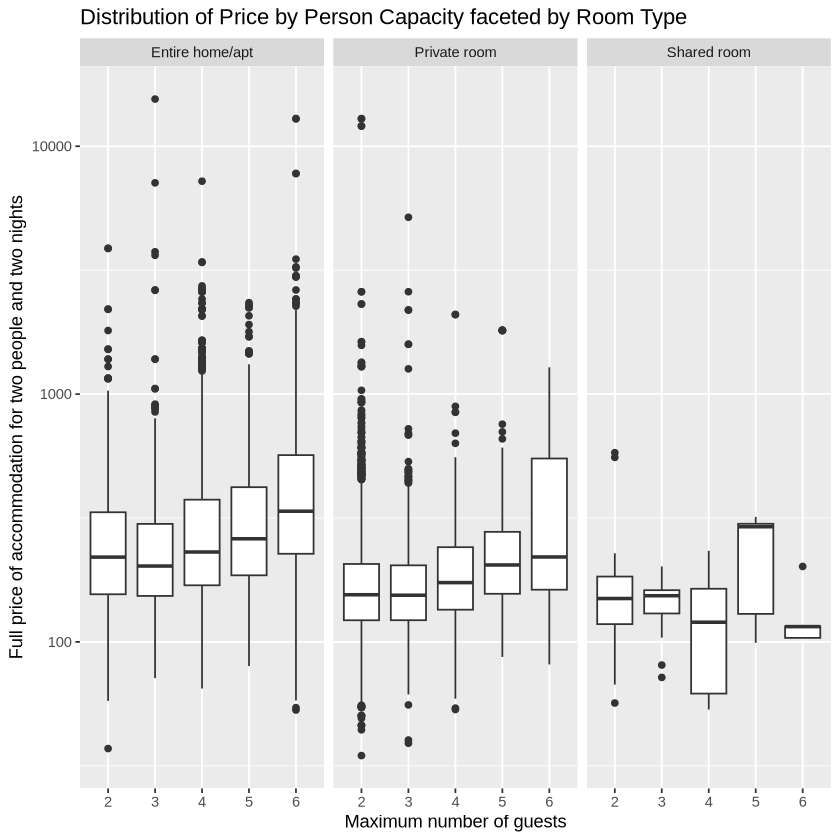

In [5]:
# Propose a visualization that is relevant to address the question or to explore the data.
ggplot(df, aes(x = factor(person_capacity), y = realSum)) +
    geom_boxplot() +
    facet_wrap(~ room_type) +
    scale_y_log10() +
    labs(title = "Distribution of Price by Person Capacity faceted by Room Type",
         x = "Maximum number of guests",
         y = "Full price of accommodation for two people and two nights")

The question to be answered using the dataset is: 
> We want to examine the association between the total price of the Airbnb listings (response) and predictors related to property characteristics (e.g., room type, maximum number of people, number of bedrooms), host attributes(e.g., superhost status, cleanliness rating, guest satisfaction rating), and geographical factors (e.g., distance from city centre, distance from nearest metro station).

This plot is relevant to the question as it visualizes the relationship between the response variable, the full price of accommodation for two people and two nights, and 2 possible input variables, the type of the accommodation and the maximum number of guests.

From the boxplot, we can see that:
- Prices generally increase with guest capacity, particularly for entire homes/apartments and private room.
- Prices generally decrease from with entire homes/apartments to private room to shared room.
- Entire homes/apartments show a wider range of prices than shared rooms, suggesting greater heterogeneity.
- The presence of outliers and skewed distributions, especially for higher-capacity listings.

### Methods and Plan

The method to address the question of interest using the selected dataset is `stepAIC()` to select a model using stepwise algorithms then use additive multiple linear regression.

The method, `stepAIC()` is appropriate as we are interested in the contribution of the whole categorical variable and not of individual levels of it relative to an arbitrary reference level and we need to evaluate the joint contribution of all dummy variables from each categorical variable at once, instead of evaluating each dummy variable at a time. The method, additive multiple linear regression, is appropriate as the response variable is continuous and the relationships between predictors and the response are linear and additive as we assumed.

The assumptions that are required to apply the method selected are:
- Linearity: the relation between the response and the input variables is linear
- Independence: error terms are not correlated
- Homoscedasticity: error terms do have a common variance
- Normality: error terms are Normally distributed
- No Multicollinearity: some input variables are not correlated

The potential limitations or weaknesses of the method selected are:
- If the relation between the response and the input variables is not linear, the model may not capture the true relationship, leading to biased estimates.
- Correlated error terms can lead to underestimated standard errors, affecting hypothesis tests.
- Heteroscedasticity can make estimators inefficient and distort statistical inference.
- Deviations from normality can affect the reliability of statistical tests.
- High multicollinearity can lead to unstable coefficient estimates and make it difficult to assess the individual effect of predictors.

### Computational Code and Output

In [6]:
set.seed(69)
split <- df %>% initial_split(prop = 0.5, strata = realSum)
train <- training(split)
test <- testing(split)

In [7]:
cat('\nTraining data has', nrow(train), 'rows.\n')
cat('\nTest data has', nrow(test), 'rows.')


Training data has 11520 rows.

Test data has 11522 rows.

In [8]:
full <- lm(realSum ~ ., data = train)
null <- lm(realSum ~ 1, data = train)
aic <- stepAIC(null, direction = "forward", scope = list(lower = null, upper = full), k = log(nrow(train)))

Start:  AIC=135775.1
realSum ~ 1

                             Df Sum of Sq        RSS    AIC
+ city                        2  84271975 1428280942 135133
+ lng                         1  81868017 1430684900 135143
+ bedrooms                    1  66124888 1446428030 135270
+ person_capacity             1  59873502 1452679415 135319
+ lat                         1  58352385 1454200532 135331
+ room_type                   2  48841989 1463710928 135416
+ attr_index                  1  28401605 1484151312 135566
+ rest_index                  1  16195100 1496357817 135660
+ metro_dist                  1   8087775 1504465142 135723
+ host_is_superhost           1   6315090 1506237827 135736
+ multi                       1   5783122 1506769796 135740
+ biz                         1   4791934 1507760983 135748
+ guest_satisfaction_overall  1   1658229 1510894688 135772
+ cleanliness_rating          1   1386781 1511166136 135774
<none>                                    1512552917 135775
+ week

In [9]:
mlr_train <- lm(formula = realSum ~ city + room_type + bedrooms + dist + attr_index + person_capacity + lng, data = train)
mlr_test <- lm(formula = realSum ~ city + room_type + bedrooms + dist + attr_index + person_capacity + lng, data = test)
full_join(tidy(mlr_train), tidy(mlr_test), by = "term") %>% select(term, p.value.x, p.value.y) %>% rename(p.value.train = p.value.x, p.value.test = p.value.y)

term,p.value.train,p.value.test
<chr>,<dbl>,<dbl>
(Intercept),1.477746e-03,2.350318e-05
citylondon,3.557643e-03,8.644845e-05
cityrome,2.167155e-03,3.654109e-05
room_typePrivate room,7.588735e-58,1.623056e-86
room_typeShared room,2.812072e-03,2.986061e-04
bedrooms,3.198850e-47,1.095461e-91
dist,8.363656e-21,3.391890e-29
attr_index,5.488512e-19,2.712718e-31
person_capacity,5.839023e-09,1.236591e-11


All variables in the model exhibit p-values below 0.01, indicating strong statistical significance and suggesting that changes in these predictors are reliably associated with variations in the response variable. This supports the hypothesis that these factors meaningfully influence the outcome, aligning with our expectations. However, it's essential to consider potential multicollinearity among predictors, as it can affect coefficient stability; examining variance inflation factors (VIFs) can help detect this issue. Additionally, ensuring that the additive model appropriately represents the data is crucial, as real-world relationships may involve interactions not captured by additive terms.